In [1]:
import pandas as pd
import numpy as np
print("Rushabh")

Rushabh


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")

<Axes: >

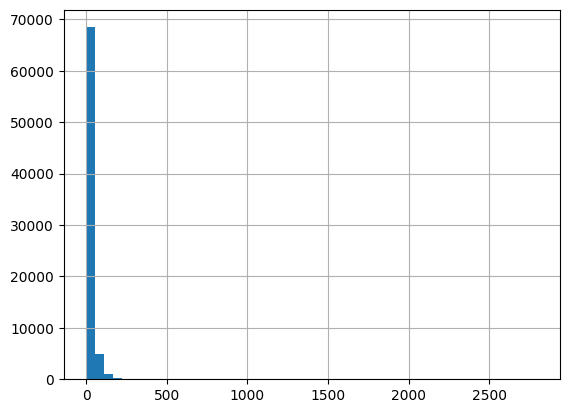

In [ ]:
df["price"].hist(bins=50)



In [ ]:
df["price"].skew()

np.float64(13.601388975432753)

In [ ]:

df["log_price"] = np.log1p(df["price"])  # log transformation kiya hai model train hone ke baad vapas 2 functions lagane hai

<Axes: >

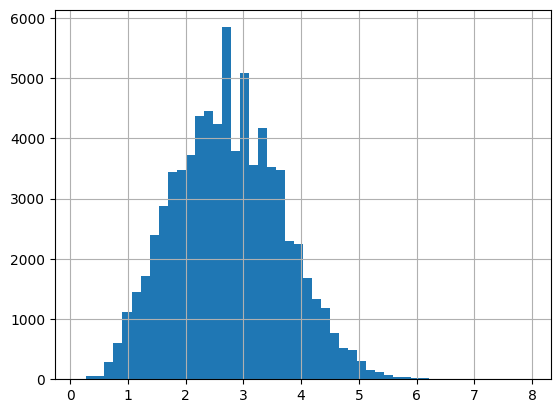

In [ ]:
df["log_price"].hist(bins=50)

In [ ]:
q1 = df["log_price"].quantile(0.25)   # safe from outlier
q3 = df["log_price"].quantile(0.75)
iqr = q3 - q1
lst = []
for i in df["log_price"]:
  if i < q1 - 1.5 * iqr or i > q3 + 1.5 * iqr:
    lst.append(i)
print(len(lst))

242


In [ ]:
df.head(11)

,sample_id,catalog_content,image_link,price,log_price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,1.773256
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,2.647592
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,1.088562
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,3.444895
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,4.211979
5,9259,"Item Name: Member's Mark Member's Mark, Basil,...",https://m.media-amazon.com/images/I/81nw0HXpCR...,18.50,2.970414
6,191846,Item Name: Goya Foods Sazonador Total Seasonin...,https://m.media-amazon.com/images/I/61dH2Ebkt0...,5.99,1.944481
7,222007,Item Name: VineCo Original Series Chilean Sauv...,https://m.media-amazon.com/images/I/71JllaFpxM...,94.00,4.553877
8,37614,Item Name: NATURES PATH CEREAL FLK MULTIGRAIN ...,https://m.media-amazon.com/images/I/21O9RftI2v...,35.74,3.603866
9,238044,Item Name: Mrs. Miller's Seedless Black Raspbe...,https://m.media-amazon.com/images/I/41miQk+RkJ...,31.80,3.490429


In [ ]:
df['catalog_content'][5]

"Item Name: Member's Mark Member's Mark, Basil, 6.25 oz\nBullet Point 1: Green Herb, Italian Staple, Great mixed with Oregano\nBullet Point 2: Large Size, Chef Bottle\nBullet Point 3: Packed in the USA\nValue: 6.25\nUnit: ounce\n"

In [ ]:
!pip install ftfy            #-- yeh run kariyo agar next cell mai error aaye toh......

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
import ftfy
df['catalog_content'] = df['catalog_content'].apply(lambda x : ftfy.fix_text(x))

In [ ]:
print(df['catalog_content'][5])

Item Name: Member's Mark Member's Mark, Basil, 6.25 oz
Bullet Point 1: Green Herb, Italian Staple, Great mixed with Oregano
Bullet Point 2: Large Size, Chef Bottle
Bullet Point 3: Packed in the USA
Value: 6.25
Unit: ounce



In [ ]:
import re
df['catalog_content'] = df['catalog_content'].apply(lambda x : re.sub(r'[^\w\s]', '',x))


In [ ]:
df['catalog_content'] = df['catalog_content'].apply(lambda x : x.lower())

In [ ]:
df['catalog_content'] = df['catalog_content'].apply(lambda x : x.replace("\n",""))

In [ ]:
df['catalog_content'][5]

'item name members mark members mark basil 625 ozbullet point 1 green herb italian staple great mixed with oreganobullet point 2 large size chef bottlebullet point 3 packed in the usavalue 625unit ounce'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=30000,
    min_df=5,
    max_df=0.85,
    stop_words="english"
)

L = vectorizer.fit_transform(df["catalog_content"].iloc[:1000])


In [ ]:
L

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 61023 stored elements and shape (1000, 3390)>

In [ ]:
print(L[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
df['catalog_content'].isnull().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,sample_id,catalog_content,image_link,price,log_price
0,33127,item name la victoria green taco sauce mild 12...,https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,1.773256
1,198967,item name salerno cookies the original butter ...,https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,2.647592
2,261251,item name bear creek hearty soup bowl creamy c...,https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,1.088562
3,55858,item name judees blue cheese powder 1125 oz g...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,3.444895
4,292686,item name kedem sherry cooking wine 127 ounce ...,https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,4.211979


In [ ]:
def smape(y_true, y_pred, eps=1e-3):
    y_true = np.clip(y_true, eps, None)
    y_pred = np.clip(y_pred, eps, None)
    return np.mean(
        np.abs(y_pred - y_true) /
        ((np.abs(y_true) + np.abs(y_pred)) / 2)
    )


In [ ]:
import os
DATASET_FOLDER = '/content/drive/MyDrive/Dataset'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Dataset')


In [ ]:
from utils import download_images
download_images(train['image_link'].iloc[:1000], '/content/drive/MyDrive/Dataset/images')

100%|██████████| 1000/1000 [00:15<00:00, 65.45it/s]


In [ ]:
print("Downloaded:", len(os.listdir('/content/drive/MyDrive/Dataset/images')))
#print("Expected:", len(image_links))


Downloaded: 1000


In [30]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 743.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.3 MB/s eta 0:00:00


In [31]:
import os, numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array


model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

X=[]
names=[]

for f in os.listdir("/content/drive/MyDrive/Dataset/images"):
  img=load_img(f"/content/drive/MyDrive/Dataset/images/{f}",target_size=(224,224))
  x = preprocess_input(np.expand_dims(img_to_array(img), 0))
  X.append(model.predict(x, verbose=0)[0]); names.append(f)

np.save('/content/drive/MyDrive/Dataset/emb.npy',np.array(X))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X,names

([array([0.07140926, 0.74591714, 1.7090759 , ..., 0.12205283, 0.38410446,
         0.47041243], dtype=float32),
  array([0.06559301, 0.01172434, 0.67062145, ..., 0.02702648, 0.71059304,
         0.01026523], dtype=float32),
  array([0.07102363, 0.1152651 , 0.6029254 , ..., 0.        , 0.09562335,
         0.04072565], dtype=float32),
  array([0.02103574, 0.        , 0.        , ..., 1.2626871 , 1.435752  ,
         1.2986318 ], dtype=float32),
  array([3.2665255 , 0.17398795, 2.1662748 , ..., 0.0586172 , 0.44197252,
         0.3117931 ], dtype=float32),
  array([0.90052974, 0.38180152, 0.06846604, ..., 0.6367544 , 0.65537274,
         2.9654186 ], dtype=float32),
  array([0.7508463 , 0.70554507, 0.53172666, ..., 0.60565895, 0.21984796,
         0.19184947], dtype=float32),
  array([0.06984001, 0.3936258 , 0.17642939, ..., 2.2595608 , 0.6690741 ,
         0.15603638], dtype=float32),
  array([0.42034072, 0.03491325, 0.78250337, ..., 0.45484242, 0.5529435 ,
         0.4245124 ], dtype=fl

In [ ]:
y_train = df["log_price"].iloc[:1000]
y_train.shape

(1000,)

In [ ]:
def extract_pack_x(name):
    if not isinstance(name, str):
        return 1
    name = name.lower()
    if "pack of" in name:
        token = name.split("pack of")[1].strip().split()[0]
        return int(token) if token.isdigit() else 1
    return 1


In [ ]:
Pack_z=df['catalog_content'].iloc[:1000].apply(extract_pack_x)

In [ ]:
Pack_z

,catalog_content
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

Pack_z=Pack_z.values.reshape(-1,1)
num = StandardScaler().fit_transform(Pack_z)
num = csr_matrix(num)


In [ ]:
from sklearn.preprocessing import normalize
img_emb = np.load('/content/drive/MyDrive/Dataset/emb.npy')   # shape: (n, 2048)

In [ ]:
img=normalize(img_emb)

In [ ]:
from scipy.sparse import hstack
X = hstack([L,img])
y = df["log_price"].iloc[:1000]

In [ ]:

L.shape,img.shape,num.shape

((1000, 3390), (1000, 2048), (1000, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X , y, test_size=0.2)


In [48]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 53.2 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 470549
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 2747
[LightGBM] [Info] Start training from score 2.783768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=1000,
              num_leaves=63, random_state=42, subsample=0.8)

In [53]:
from sklearn.linear_model import Ridge  # Validation SMAPE: 0.6702485136849475
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)


Ridge()

In [54]:
y_pred = model.predict(X_val)


In [55]:
pred_price = np.expm1(y_pred)         # vo log use kiya tha n upar usse thik karne ko kiya
pred_price = np.clip(pred_price, 1.0, None)

In [56]:
true_price = np.expm1(y_val)

val_smape = smape(true_price, pred_price)
print("Validation SMAPE:", val_smape)

Validation SMAPE: 0.5986429439924117
